In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree


In [3]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=0
)

In [4]:
# Create the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

Text(0.5, 1.0, 'Confusion Matrix')

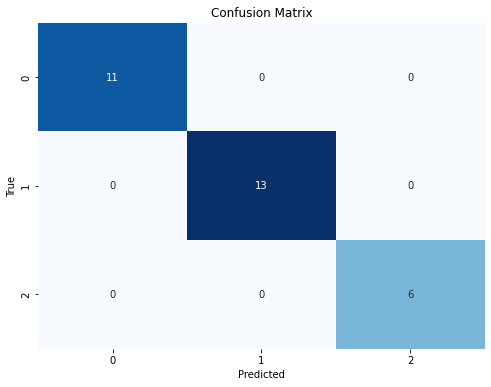

In [5]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')

In [14]:
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

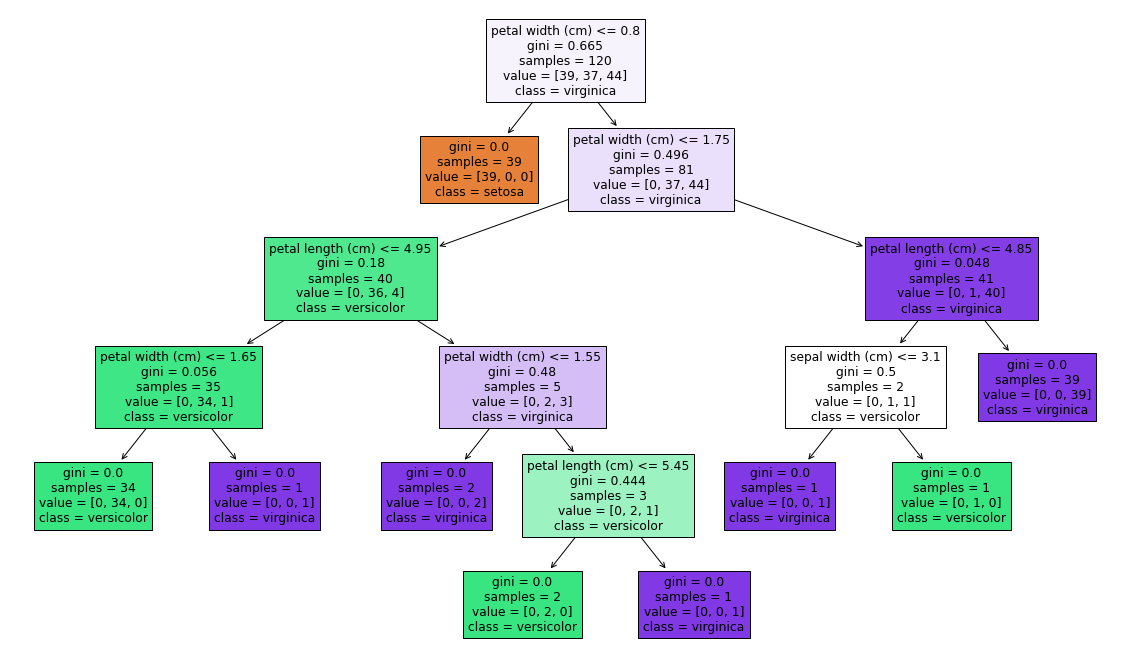

In [6]:
# Display the decision tree structure
plt.figure(figsize=(20, 12))
_ = tree.plot_tree(
    clf,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True
)

### Random Forest

In [7]:
# spectros.shape = (1_millon, 4000)

(150, 4)

In [8]:
# Create a Random Forest classifier
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=0
)

# Train the classifier
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

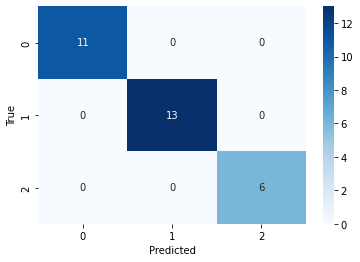

In [9]:
# Make predictions on the test set
y_pred = rf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
plt.show()

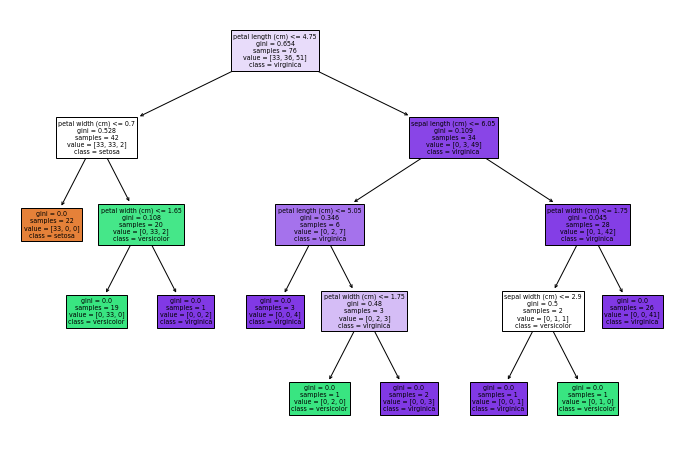

In [11]:
# Get the decision tree structure from the Random Forest
trees = rf.estimators_

# Visualize the first decision tree in the Random Forest
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_axis_off()
_ = tree.plot_tree(
    trees[-1],
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True
)

Text(0, 0.5, 'Feature')

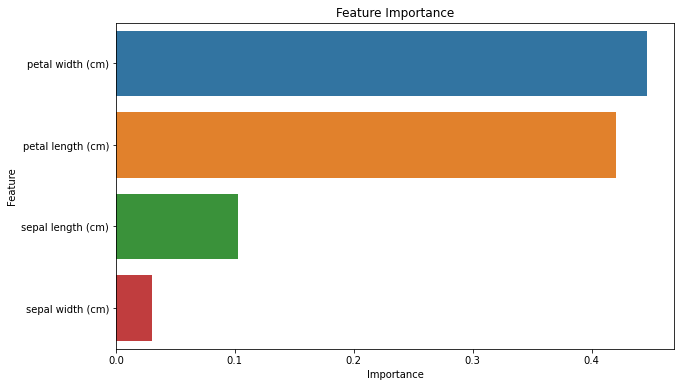

In [12]:
# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame with feature names and importances
feature_importances = pd.DataFrame(
    {'Feature': iris.feature_names, 'Importance': importances}
)

# Sort the DataFrame by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the feature importances
sns.barplot(x='Importance', y='Feature', data=feature_importances, ax=ax)

# Set the title and labels
ax.set_title('Feature Importance')
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')

In [13]:
feature_importances.Importance.sum()

1.0000000000000002